# Bag of Words 


In [1]:
import numpy as np
import pandas as pd

In [38]:
data_imdb = pd.read_csv("imdb_labelled.txt", delimiter='\t', header=None)
data_imdb.columns = ["Review_text", "Review_class"]

data_amazon = pd.read_csv("amazon_cells_labelled.txt", delimiter='\t', header=None)
data_amazon.columns = ["Review_text", "Review_class"]

data_yelp = pd.read_csv("yelp_labelled.txt", delimiter='\t', header=None)
data_yelp.columns = ["Review_text", "Review_class"]

data = pd.concat([data_imdb, data_amazon, data_yelp])
data



,Review_text,Review_class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [39]:
data_amazon.shape,data_imdb.shape, data_yelp.shape

((1000, 2), (748, 2), (1000, 2))

In [40]:
data = pd.concat([data_imdb,data_amazon,data_yelp])
data

,Review_text,Review_class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [41]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [45]:
def clean_text(df):
    all_reviews = list()
    lines = df['Review_text'].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('',text)
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]","",text) # remove punctuations
        
        tokens = word_tokenize(text) # returns the list and .split returns as string
        
        table = str.maketrans('','',string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        stop_words.discard("not") # discard the not word
        ps = PorterStemmer()
        
        words = [ps.stem(w) for w in words if w not in stop_words]
        words = ' '.join(words)
        all_reviews.append(words)
        
    return all_reviews
        

all_reviews = clean_text(data)
all_reviews[0:20]
        

['slowmov aimless movi distress drift young man',
 'not sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost nonexist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act postproduct edit direct aspect filmmak',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film some

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=3) # taking words occured atleast 3 times in the corpus
x = cv.fit_transform(all_reviews).toarray()
y = data['Review_class']
np.shape(x) , np.shape(y)

((2748, 1192), (2748,))

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test ,  y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
from sklearn.naive_bayes import GaussianNB
model  = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [60]:
y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score , roc_auc_score , roc_curve, auc
print(accuracy_score(y_pred,y_test))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.6618181818181819
0.7038216560509554
0.6314285714285715
0.6603496614473128


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
fpr , tpr, threshold = roc_curve(y_test,y_pred)

In [86]:
auc_crve = auc(fpr, tpr)
auc_crve

0.6603496614473128

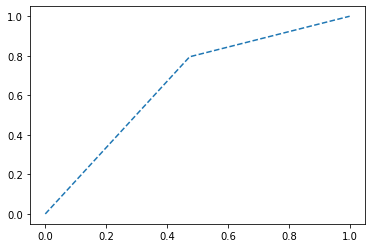

In [90]:
plt.plot(fpr,tpr,linestyle='--',label='auc score')
plt.show()